<a href="https://colab.research.google.com/github/Karundangata/DSAIC/blob/main/PredictionSymptoms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
print(sklearn.__version__)


1.4.0


In [ ]:
!pip install --upgrade scikit-learn


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
import joblib  # Import the joblib module for saving and loading models
import pandas as pd  # Import pandas for data manipulation and analysis
import numpy as np  # Import NumPy for numerical operations
import matplotlib.pyplot as plt  # Import matplotlib for plotting
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV  # Import various modules for model selection and evaluation
from sklearn.svm import SVC  # Import Support Vector Classifier from scikit-learn
import seaborn as sns  # Import seaborn for statistical data visualization
from sklearn.utils import shuffle  # Import shuffle function from scikit-learn utils
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier  # Import various linear models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier  # Import various ensemble models
from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier for k-nearest neighbors
from sklearn.naive_bayes import GaussianNB  # Import Gaussian Naive Bayes
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn import metrics  # Import scikit-learn metrics module for additional metrics


In [ ]:
import os  # Import the os module for interacting with the operating system

# Walk through the directory specified ('/kaggle/input')
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        # Print the full path of each file in the directory
        print(os.path.join(dirname, filename))


Load and Shuffle the dataset

In [ ]:
df = pd.read_csv('/content/dataset.csv')

In [ ]:
df = shuffle(df,random_state=42)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin_rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dataset characteristics

In [ ]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Acne,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,stomach_bleeding,chest_pain,chest_pain,loss_of_smell,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [ ]:
print(df.columns)  # Print the column names of the DataFrame 'df'
print('')          # Print an empty line (newline) for better readability


Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17'],
      dtype='object')



In [ ]:
print(df.shape)
print('')

(4920, 18)



Check for null and NaN values

In [ ]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


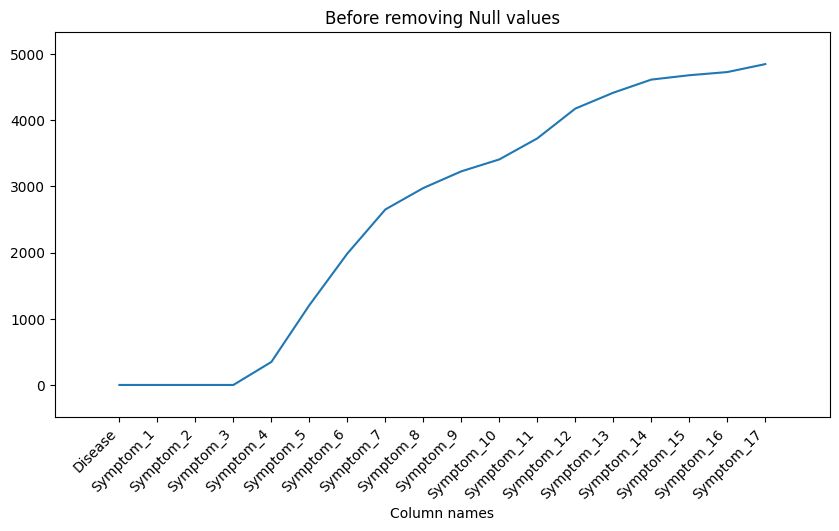

In [ ]:
plt.figure(figsize=(10,5))  # Set the size of the figure
plt.plot(null_checker.index, null_checker['count'])  # Plot the count of null values for each column
plt.xticks(null_checker.index, null_checker.index, rotation=45, horizontalalignment='right')  # Set the x-axis ticks
plt.title('Before removing Null values')  # Set the title of the plot
plt.xlabel('Column names')  # Set the label for the x-axis
plt.margins(0.1)  # Add margins to the plot
plt.show()  # Display the plot


In [ ]:
df = df.replace({np.nan: 0})  # Replace NaN values with 0 in the DataFrame 'df'
df.head(2)  # Display the first 2 rows of the DataFrame 'df'

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin rash,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4916,Acne,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
ordered_symptoms = []  # Initialize an empty list to store ordered symptoms for each disease

# Loop through each row in the DataFrame
for i in range(len(df['Disease'])):
    temp_list = []  # Initialize an empty list to store symptoms for the current disease
    # Loop through columns 1 to 16
    for k in range(1, 17):
        # If the value in the current column is 0, stop the loop
        if df.iloc[i][k] == 0:
            break
        # Append the symptom to the temporary list
        temp_list.append(df.iloc[i][k])
    # Append the list of ordered symptoms for the current disease to the main list
    ordered_symptoms.append(temp_list)


In [ ]:
diseases = sorted(df['Disease'].unique())  # Create a sorted list of unique disease names from the 'Disease' column


In [ ]:
df.isnull().sum()  # Calculate the sum of missing values in each column of the DataFrame 'df'


Disease       0
Symptom_1     0
Symptom_2     0
Symptom_3     0
Symptom_4     0
Symptom_5     0
Symptom_6     0
Symptom_7     0
Symptom_8     0
Symptom_9     0
Symptom_10    0
Symptom_11    0
Symptom_12    0
Symptom_13    0
Symptom_14    0
Symptom_15    0
Symptom_16    0
Symptom_17    0
dtype: int64

Removing Hyphen from strings

In [ ]:
for col in df.columns:

    df[col] = df[col].str.replace('_',' ')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove the trailing space from the symptom columns

In [ ]:
cols = df.columns  # Get the column names of the DataFrame 'df'
data = df[cols].values.flatten()  # Flatten the values of the DataFrame 'df' into a 1D array

s = pd.Series(data)  # Create a pandas Series from the flattened array
s = s.str.strip()  # Strip leading and trailing whitespaces from each element in the Series
s = s.values.reshape(df.shape)  # Reshape the Series back into the original shape of the DataFrame 'df'

df = pd.DataFrame(s, columns=df.columns)  # Create a new DataFrame 'df' from the reshaped Series with the original column names
df.head()  # Display the first few rows of the modified DataFrame


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Fill the NaN values with zero

In [ ]:
df = df.fillna(0)  # Fill NaN values in the DataFrame 'df' with 0
df.head()  # Display the first few rows of the modified DataFrame


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,0,0,0,0,0,0
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,0,0,0,0,0,0,0,0,0,0


Symptom severity rank

In [ ]:
df1 = pd.read_csv('/content/Symptom-severity.csv')
df1['Symptom'] = df1['Symptom'].str.replace('_',' ')
df1.head()

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5


In [ ]:
for i in df1.index:
    print(df1['Symptom'][i], df1['weight'][i])  # Print each Symptom and its corresponding weight in DataFrame 'df1'


itching 1
skin rash 3
nodal skin eruptions 4
continuous sneezing 4
shivering 5
chills 3
joint pain 3
stomach pain 5
acidity 3
ulcers on tongue 4
muscle wasting 3
vomiting 5
burning micturition 6
spotting urination 6
fatigue 4
weight gain 3
anxiety 4
cold hands and feets 5
mood swings 3
weight loss 3
restlessness 5
lethargy 2
patches in throat 6
irregular sugar level 5
cough 4
high fever 7
sunken eyes 3
breathlessness 4
sweating 3
dehydration 4
indigestion 5
headache 3
yellowish skin 3
dark urine 4
nausea 5
loss of appetite 4
pain behind the eyes 4
back pain 3
constipation 4
abdominal pain 4
diarrhoea 6
mild fever 5
yellow urine 4
yellowing of eyes 4
acute liver failure 6
fluid overload 6
swelling of stomach 7
swelled lymph nodes 6
malaise 6
blurred and distorted vision 5
phlegm 5
throat irritation 4
redness of eyes 5
sinus pressure 4
runny nose 5
congestion 5
chest pain 7
weakness in limbs 7
fast heart rate 5
pain during bowel movements 5
pain in anal region 6
bloody stool 5
irritation

In [ ]:
#convert data_severity to dictionnary
data_dict = df1.set_index('Symptom').T.to_dict()

<ipython-input-52-a730dc72b90a>:2: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  data_dict = df1.set_index('Symptom').T.to_dict()


In [ ]:
df1.shape


(133, 2)

In [ ]:
df1.describe

<bound method NDFrame.describe of                   Symptom  weight
0                 itching       1
1               skin rash       3
2    nodal skin eruptions       4
3     continuous sneezing       4
4               shivering       5
..                    ...     ...
128    inflammatory nails       2
129               blister       4
130  red sore around nose       2
131     yellow crust ooze       3
132             prognosis       5

[133 rows x 2 columns]>

Get overall list of symptoms

In [ ]:
df1['Symptom'].unique()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

In [ ]:
vals = df.values  # Extract the values from the DataFrame 'df'
symptoms = df1['Symptom'].unique()  # Get unique symptoms from the 'Symptom' column of DataFrame 'df1'

# Iterate through each unique symptom
for i in range(len(symptoms)):
    # Replace values in 'vals' with corresponding weights from 'df1'
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]

d = pd.DataFrame(vals, columns=cols)  # Create a new DataFrame 'd' with modified values and original column names
d.head()  # Display the first few rows of the modified DataFrame 'd'


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,4,3,3,5,3,6,5,4,2,2,6,0,0,0,0,0,0
3,AIDS,3,6,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,5,3,5,4,4,4,0,0,0,0,0,0,0,0,0,0


Assign symptoms with no rank to zero

In [ ]:
d = d.replace('dischromic  patches', 0)
d = d.replace('spotting  urination',0)
df = d.replace('foul smell of urine',0)
df.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,4,3,3,5,3,6,5,4,2,2,6,0,0,0,0,0,0
3,AIDS,3,6,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,5,3,5,4,4,4,0,0,0,0,0,0,0,0,0,0
5,Hypertension,3,7,4,4,3,0,0,0,0,0,0,0,0,0,0,0,0
6,Hypoglycemia,5,4,4,3,3,5,5,4,4,4,2,4,0,0,0,0,0
7,Arthritis,2,4,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Hepatitis B,1,4,2,3,4,4,4,4,4,6,5,2,0,0,0,0,0
9,Migraine,3,5,3,5,4,4,3,2,3,0,0,0,0,0,0,0,0


Check if entire columns have zero values so we can drop those values

In [ ]:
# Apply a lambda function to calculate the count of null values in each column and create a DataFrame 'null_checker'
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)


            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4       0
Symptom_5       0
Symptom_6       0
Symptom_7       0
Symptom_8       0
Symptom_9       0
Symptom_10      0
Symptom_11      0
Symptom_12      0
Symptom_13      0
Symptom_14      0
Symptom_15      0
Symptom_16      0
Symptom_17      0


In [ ]:
# Check if all elements in each column of DataFrame 'df' (specified by 'cols') are equal to 0
(df[cols] == 0).all()


Disease       False
Symptom_1     False
Symptom_2     False
Symptom_3     False
Symptom_4     False
Symptom_5     False
Symptom_6     False
Symptom_7     False
Symptom_8     False
Symptom_9     False
Symptom_10    False
Symptom_11    False
Symptom_12    False
Symptom_13    False
Symptom_14    False
Symptom_15    False
Symptom_16    False
Symptom_17    False
dtype: bool

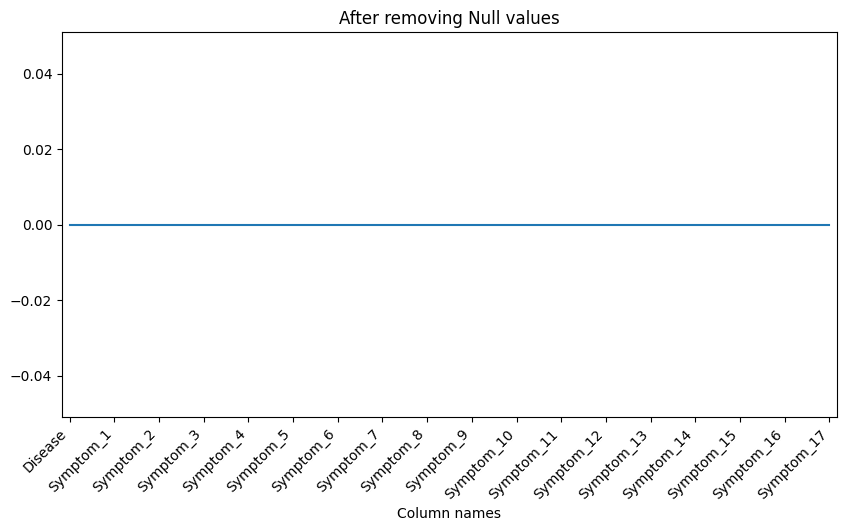

In [ ]:
plt.figure(figsize=(10,5))  # Set the size of the figure
plt.plot(null_checker.index, null_checker['count'])  # Plot the count of null values for each column
plt.xticks(null_checker.index, null_checker.index, rotation=45, horizontalalignment='right')  # Set the x-axis ticks
plt.title('After removing Null values')  # Set the title of the plot
plt.xlabel('Column names')  # Set the label for the x-axis
plt.margins(0.01)  # Add margins to the plot for better visibility
plt.show()  # Display the plot


In [ ]:
print("Number of symptoms used to identify the disease ", len(df1['Symptom'].unique()))  # Print the count of unique symptoms in DataFrame 'df1'
print("Number of diseases that can be identified ", len(df['Disease'].unique()))  # Print the count of unique diseases in DataFrame 'df'


Number of symptoms used to identify the disease  132
Number of diseases that can be identified  41


Get the names of diseases from data

In [ ]:
df['Disease'].unique()  # Retrieve the unique values in the 'Disease' column of DataFrame 'df'


array(['Acne', 'Hyperthyroidism', 'AIDS', 'Chronic cholestasis',
       'Hypertension', 'Hypoglycemia', 'Arthritis', 'Hepatitis B',
       'Migraine', 'Urinary tract infection', 'Diabetes', 'Hepatitis D',
       'Psoriasis', 'Alcoholic hepatitis', 'Dimorphic hemmorhoids(piles)',
       'Hepatitis E', 'Cervical spondylosis', 'Bronchial Asthma',
       'hepatitis A', 'Allergy', 'Hepatitis C', 'Pneumonia',
       'Hypothyroidism', 'Gastroenteritis', 'Varicose veins', 'Jaundice',
       'Drug Reaction', '(vertigo) Paroymsal  Positional Vertigo',
       'Heart attack', 'Tuberculosis', 'Typhoid', 'Common Cold',
       'Peptic ulcer diseae', 'Paralysis (brain hemorrhage)',
       'Fungal infection', 'Impetigo', 'GERD', 'Dengue', 'Malaria',
       'Chicken pox', 'Osteoarthristis'], dtype=object)

Select the features as symptoms column and label as Disease column

In [ ]:
data = df.iloc[:, 1:].values  # Extract the values from DataFrame 'df' excluding the first column ('Disease')
labels = df['Disease'].values  # Extract the values from the 'Disease' column of DataFrame 'df'


Splitting the dataset to training (80%) and testing (20%)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size=0.8, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)  # Print the shapes of the training and testing sets


(3936, 17) (984, 17) (3936,) (984,)


Compute the F1 score, also known as balanced F-score or F-measure.
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is

F1 = 2 * (precision * recall) / (precision + recall)

F1-score% = 95.7812664665753 | Accuracy% = 95.83333333333334


<Axes: >

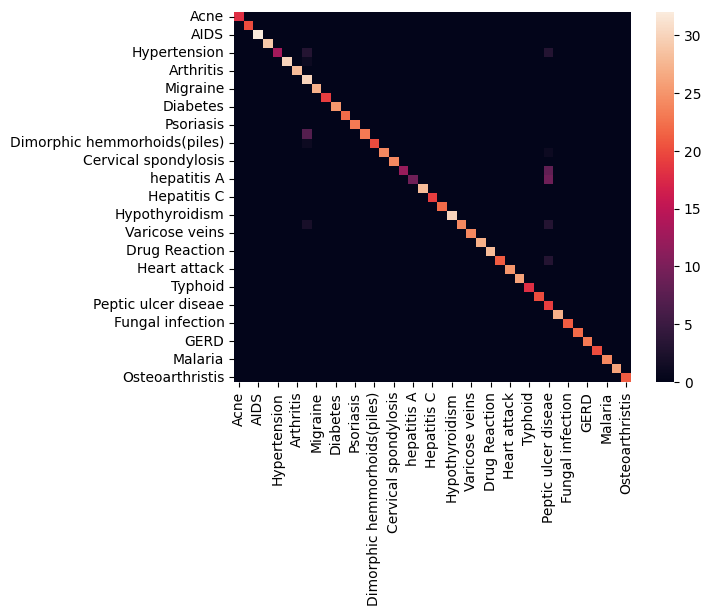

In [ ]:
tree =DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=13)
tree.fit(x_train, y_train)
preds=tree.predict(x_test)
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

In [ ]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
DS_train =cross_val_score(tree, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(DS_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (DS_train.mean()*100.0, DS_train.std()*100.0))

Mean Accuracy: 95.706%, Standard Deviation: (1.99%)


In [ ]:
fold = KFold(n_splits=10,shuffle=True,random_state=42)
DS_test =cross_val_score(tree, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(DS_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (DS_test.mean()*100.0, DS_test.std()*100.0))

Mean Accuracy: 94.198%, Standard Deviation: (3.57%)


Random Forest

In [ ]:
rfc=RandomForestClassifier(random_state=42)

[3 5 3 5 4 4 3 2 3 0 0 0 0 0 0 0 0]
Migraine
F1-score% = 99.58380389536958 | Accuracy% = 99.59349593495935


<Axes: >

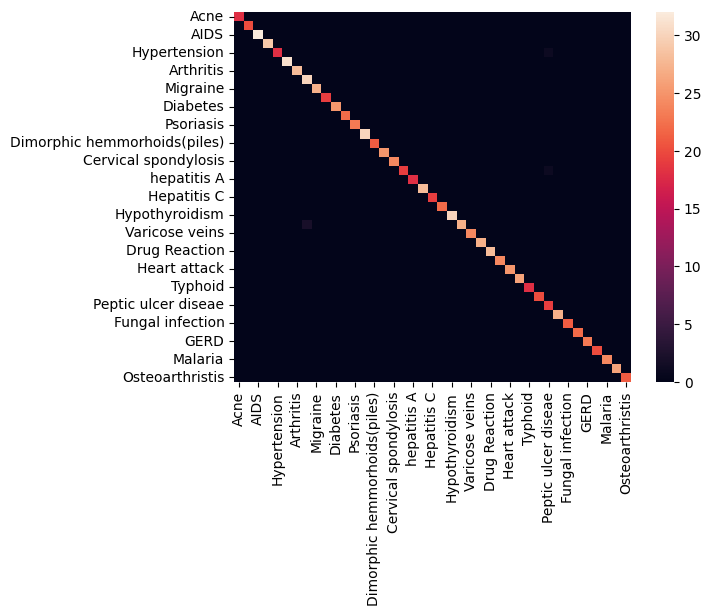

In [ ]:
rnd_forest = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 500, max_depth=13)
rnd_forest.fit(x_train,y_train)
preds=rnd_forest.predict(x_test)
print(x_test[0])
print(preds[0])
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

In [ ]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_train =cross_val_score(rnd_forest, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_train.mean()*100.0, rnd_forest_train.std()*100.0))

Mean Accuracy: 99.187%, Standard Deviation: (0.44%)


In [ ]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_test =cross_val_score(rnd_forest, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_test.mean()*100.0, rnd_forest_test.std()*100.0))

Mean Accuracy: 98.575%, Standard Deviation: (1.31%)


Fucntion to manually test the models

In [ ]:
discrp = pd.read_csv("/content/symptom_Description.csv")

In [ ]:
discrp.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [ ]:
discrp.shape

(41, 2)

In [ ]:
discrp.describe

<bound method NDFrame.describe of                                     Disease  \
0                             Drug Reaction   
1                                   Malaria   
2                                   Allergy   
3                            Hypothyroidism   
4                                 Psoriasis   
5                                      GERD   
6                       Chronic cholestasis   
7                               hepatitis A   
8                           Osteoarthristis   
9   (vertigo) Paroymsal  Positional Vertigo   
10                             Hypoglycemia   
11                                     Acne   
12                                 Diabetes   
13                                 Impetigo   
14                             Hypertension   
15                      Peptic ulcer diseae   
16             Dimorphic hemorrhoids(piles)   
17                              Common Cold   
18                              Chicken pox   
19                     Cer

In [ ]:
precaution = pd.read_csv("/content/symptom_precaution.csv")

In [ ]:
precaution.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [ ]:
precaution.shape


(41, 5)

In [ ]:
precaution.describe

<bound method NDFrame.describe of                                     Disease  \
0                             Drug Reaction   
1                                   Malaria   
2                                   Allergy   
3                            Hypothyroidism   
4                                 Psoriasis   
5                                      GERD   
6                       Chronic cholestasis   
7                               hepatitis A   
8                           Osteoarthristis   
9   (vertigo) Paroymsal  Positional Vertigo   
10                             Hypoglycemia   
11                                     Acne   
12                                Diabetes    
13                                 Impetigo   
14                            Hypertension    
15                      Peptic ulcer diseae   
16             Dimorphic hemmorhoids(piles)   
17                              Common Cold   
18                              Chicken pox   
19                     Cer

Save Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Assuming you have trained a Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model (replace this with your actual training code)
random_forest_model.fit(x_train, y_train)

# Save the trained model to a file
joblib.dump(random_forest_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

Load Model

In [ ]:
import joblib

# Load the saved model from a file
loaded_random_forest_model = joblib.load('random_forest_model.pkl')

# Now you can use loaded_random_forest_model for predictions
predictions = loaded_random_forest_model.predict(x_test)


In [ ]:
def predd(x,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17):
    psymptoms = [S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17]
    #print(psymptoms)
    a = np.array(df1["Symptom"])
    b = np.array(df1["weight"])
    for j in range(len(psymptoms)):
        for k in range(len(a)):
            if psymptoms[j]==a[k]:
                psymptoms[j]=b[k]
    psy = [psymptoms]
    pred2 = x.predict(psy)
    disp= discrp[discrp['Disease']==pred2[0]]
    disp = disp.values[0][1]
    recomnd = precaution[precaution['Disease']==pred2[0]]
    c=np.where(precaution['Disease']==pred2[0])[0][0]
    precuation_list=[]
    for i in range(1,len(precaution.iloc[c])):
          precuation_list.append(precaution.iloc[c,i])
    print("The Disease Name: ",pred2[0])
    print("The Disease Discription: ",disp)
    print("Recommended Things to do at home: ")
    for i in precuation_list:
        print(i)

Comparison between algorithms testing and training

In [ ]:
n_groups = 2
algorithms = ('Decision Tree', 'Random Forest')
train_accuracy = (DS_train.mean()*100.0,
                 rnd_forest_train.mean()*100.0,)

In [ ]:
test_accuracy = (DS_test.mean()*100.0,
                 rnd_forest_test.mean()*100.0)

In [ ]:
Standard_Deviation=(DS_test.std()*100.0,
                 rnd_forest_test.std()*100.0)

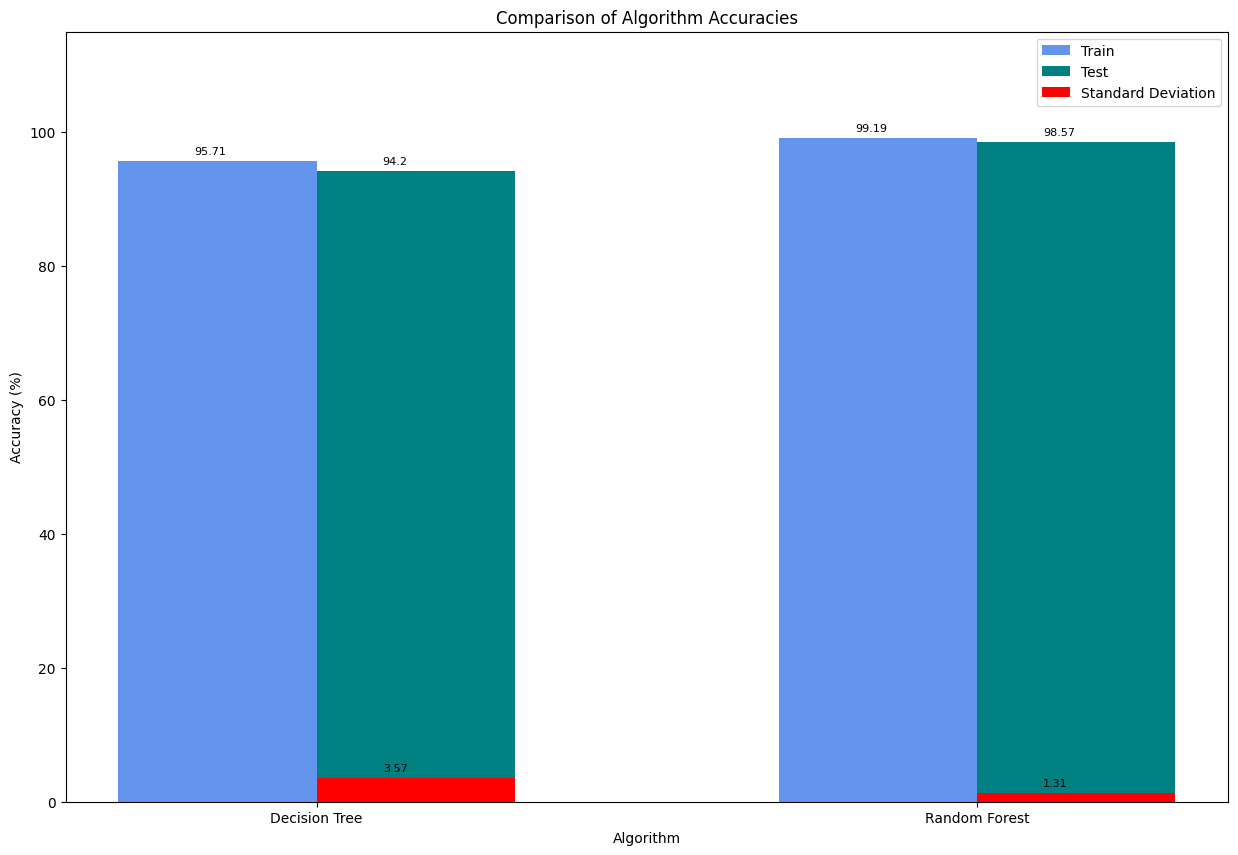

In [ ]:
# create plot
fig, ax = plt.subplots(figsize=(15, 10))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 1
rects1 = plt.bar(index, train_accuracy, bar_width, alpha = opacity, color='Cornflowerblue', label='Train')
rects2 = plt.bar(index + bar_width, test_accuracy, bar_width, alpha = opacity, color='Teal', label='Test')
rects3 = plt.bar(index + bar_width, Standard_Deviation, bar_width, alpha = opacity, color='red', label='Standard Deviation')
plt.xlabel('Algorithm') # x axis label
plt.ylabel('Accuracy (%)') # y axis label
plt.ylim(0, 115)
plt.title('Comparison of Algorithm Accuracies') # plot title
plt.xticks(index + bar_width * 0.5, algorithms) # x axis data labels
plt.legend(loc = 'upper right') # show legend
for index, data in enumerate(train_accuracy):
    plt.text(x = index - 0.035, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(test_accuracy):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(Standard_Deviation):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))

Test it Like The user would do

In [ ]:
sympList=df1["Symptom"].to_list()
predd(rnd_forest,sympList[7],sympList[5],sympList[2],sympList[80],0,0,0,0,0,0,0,0,0,0,0,0,0)

The Disease Name:  Paralysis (brain hemorrhage)
The Disease Discription:  Intracerebral hemorrhage (ICH) is when blood suddenly bursts into brain tissue, causing damage to your brain. Symptoms usually appear suddenly during ICH. They include headache, weakness, confusion, and paralysis, particularly on one side of your body.
Recommended Things to do at home: 
massage
eat healthy
exercise
consult doctor


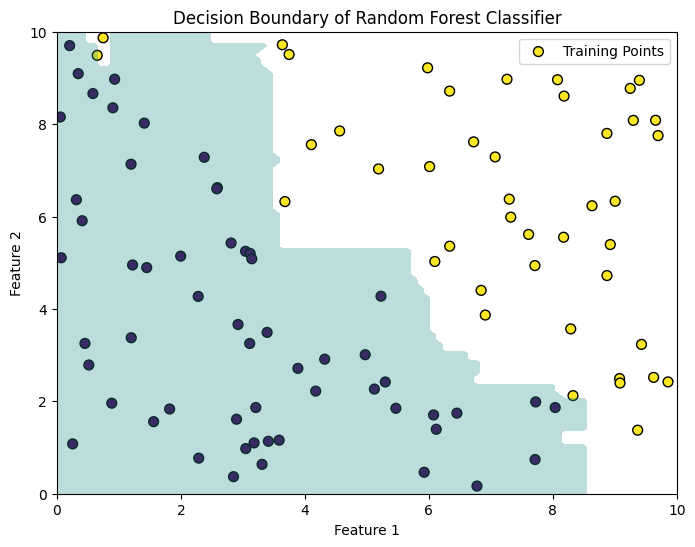

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Create a simple 2D dataset
np.random.seed(42)
X = np.random.rand(100, 2) * 10
y = (X[:, 0] + X[:, 1] > 10).astype(int)

# Train a Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X, y)

# Plot the decision boundary
plt.figure(figsize=(8, 6))

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50, label='Training Points')

# Create a meshgrid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 10, 100))
Z = random_forest_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3, levels=[-0.5, 0.5])

# Set labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of Random Forest Classifier')

# Show the plot
plt.legend()
plt.show()
